# Coding Practice Session 4
## Distribution Plots

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
penguins = sns.load_dataset("penguins")

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguins.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [8]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
penguins.dropna(inplace=True)

In [10]:
penguins.duplicated().any()

np.False_

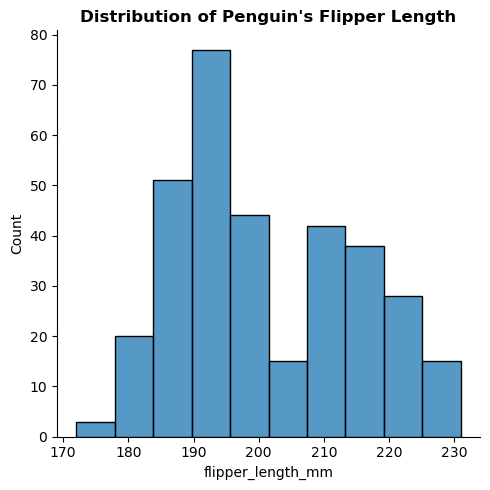

In [11]:
sns.displot(data=penguins, x="flipper_length_mm")
plt.title("Distribution of Penguin's Flipper Length", fontweight="bold")
plt.tight_layout()

### Histograms

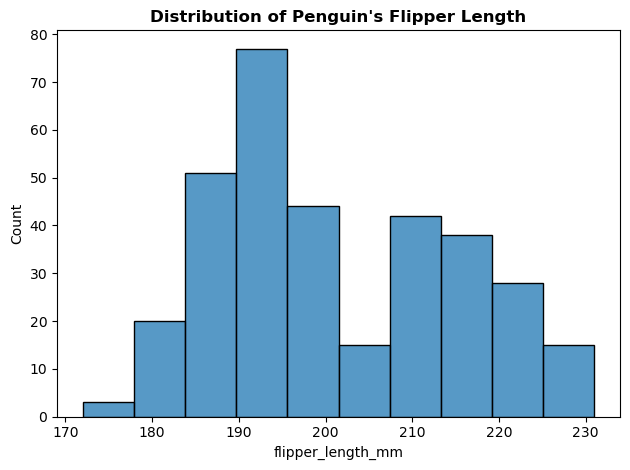

In [12]:
fig, ax = plt.subplots()
sns.histplot(data=penguins, ax=ax, x="flipper_length_mm")
ax.set_title("Distribution of Penguin's Flipper Length", fontweight="bold")

fig.tight_layout()

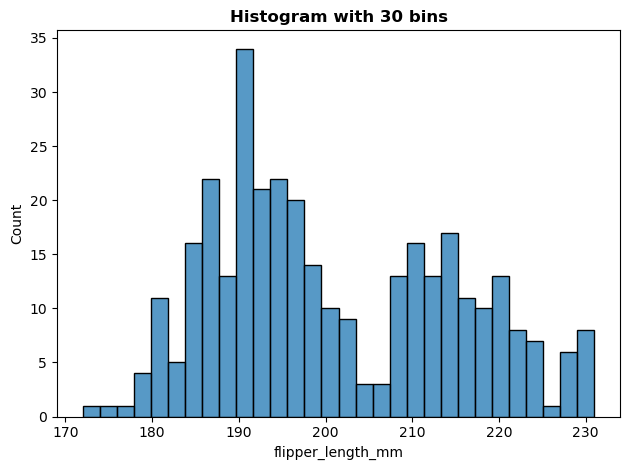

In [13]:
ax = sns.histplot(data=penguins, x="flipper_length_mm", bins=30)
ax.set_title("Histogram with 30 bins", fontweight="bold")

ax.figure.tight_layout()

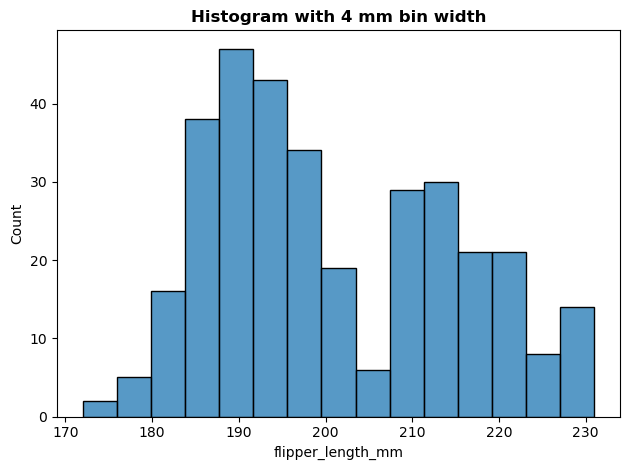

In [14]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=4)
plt.title("Histogram with 4 mm bin width", fontweight="bold")

plt.tight_layout()

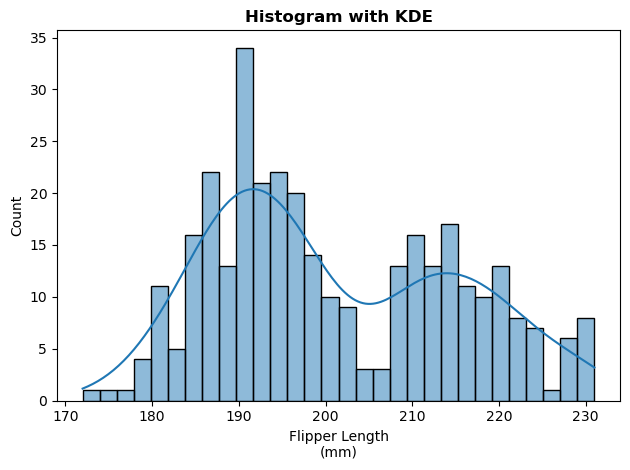

In [15]:
ax = sns.histplot(data=penguins, x="flipper_length_mm", kde=True, bins=30)
ax.set_title("Histogram with KDE", fontweight="bold")
ax.set_xlabel("Flipper Length\n(mm)")

plt.tight_layout()

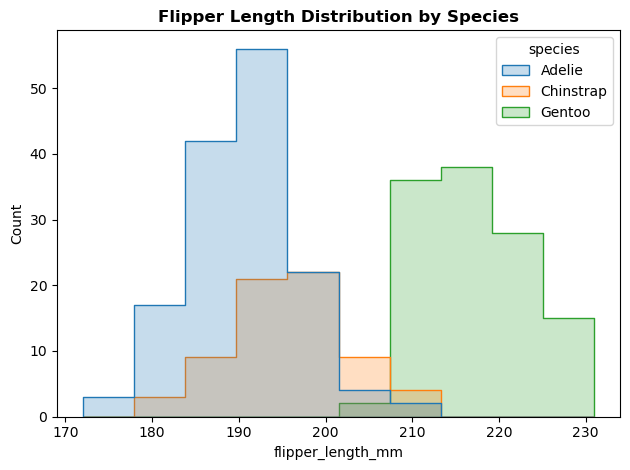

In [16]:
fig, ax = plt.subplots()
sns.histplot(data=penguins, ax=ax, x="flipper_length_mm", hue="species", element="step")
ax.set_title("Flipper Length Distribution by Species", fontweight="bold")

fig.tight_layout()

In [17]:
planets = sns.load_dataset("planets")

In [18]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [19]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [20]:
planets["mass"].mode()

0    1.8
1    1.9
Name: mass, dtype: float64

In [21]:
planets.fillna(
    {
        "orbital_period": planets["orbital_period"].mean(),
        "mass": planets["mass"].mode().iloc[1],
        "distance": planets["distance"].median(),
    },
    inplace=True,
)

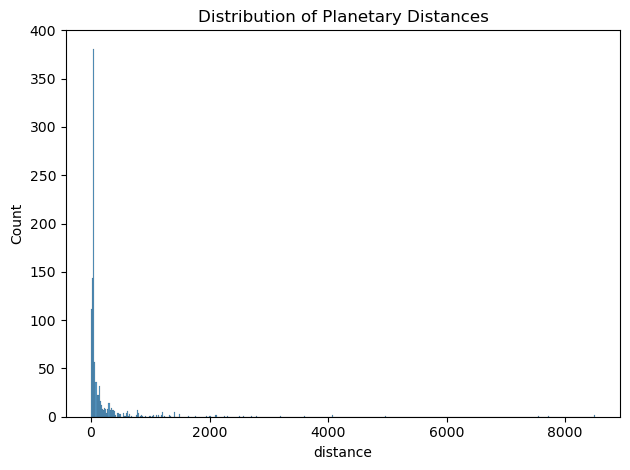

In [22]:
sns.histplot(data=planets, x="distance", log_scale=False)
plt.title("Distribution of Planetary Distances")

plt.tight_layout()

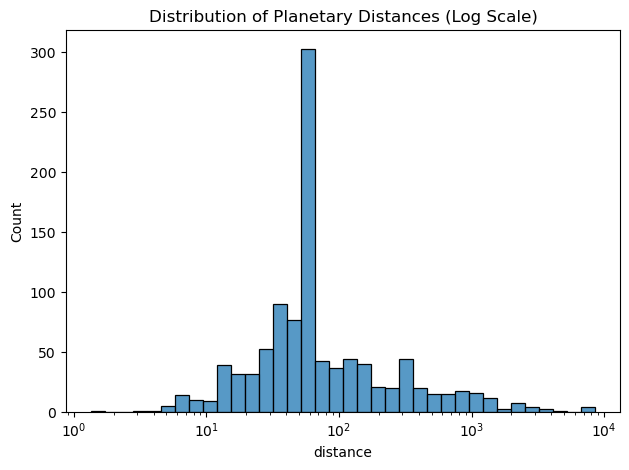

In [23]:
# using logarithmic scale
ax = sns.histplot(data=planets, x="distance", log_scale=True)
ax.set_title("Distribution of Planetary Distances (Log Scale)")

ax.figure.tight_layout()

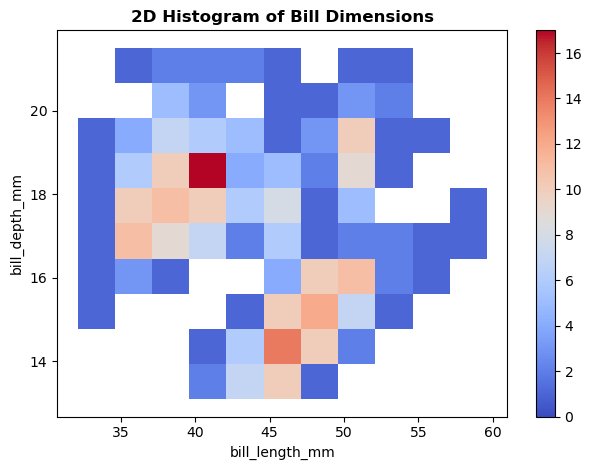

In [24]:
fig, ax = plt.subplots()
sns.histplot(
    data=penguins,
    ax=ax,
    x="bill_length_mm",
    y="bill_depth_mm",
    cmap="coolwarm",
    cbar=True,
)

ax.set_title("2D Histogram of Bill Dimensions", fontweight="bold")

fig.tight_layout()

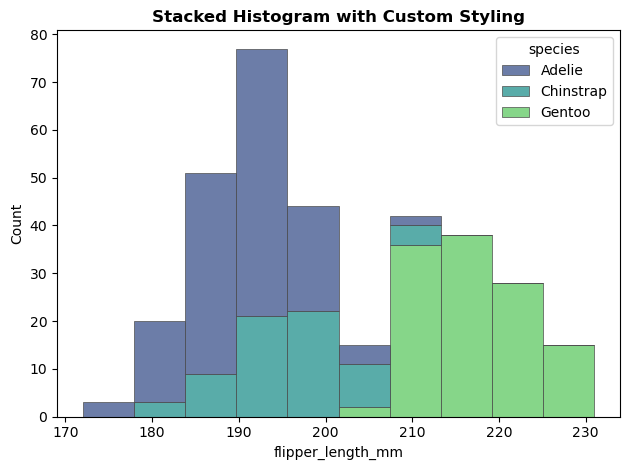

In [25]:
ax = sns.histplot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack",
    linewidth=0.5,
    palette="viridis",
    edgecolor="0.3",
)

ax.set_title("Stacked Histogram with Custom Styling", fontweight="bold")
ax.figure.tight_layout()

### Kernel Density Estimation Plots

In [26]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


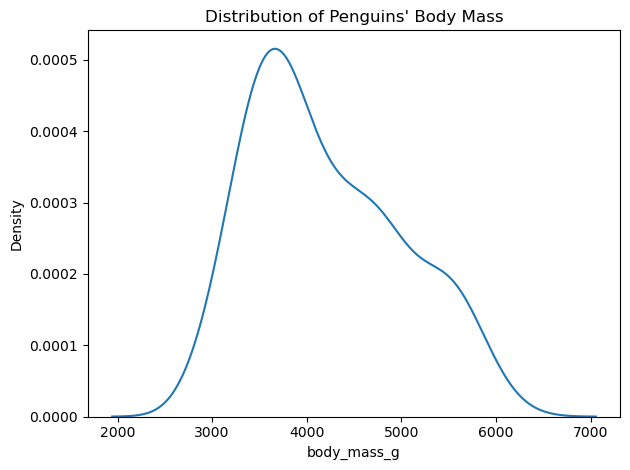

In [27]:
ax = sns.kdeplot(data=penguins, x="body_mass_g")
ax.set_title("Distribution of Penguins' Body Mass")

ax.figure.tight_layout()

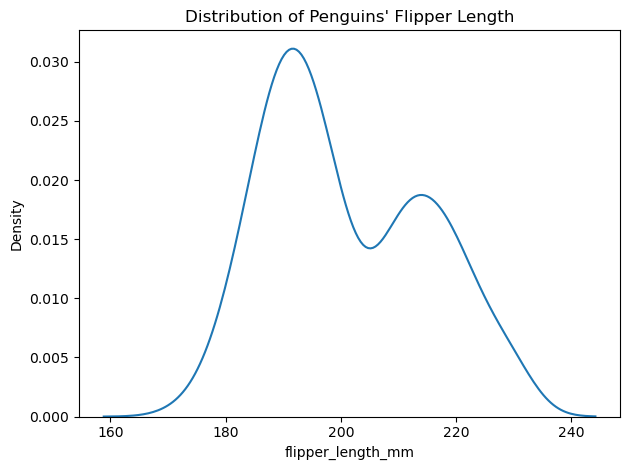

In [28]:
sns.kdeplot(data=penguins, x="flipper_length_mm")
plt.title("Distribution of Penguins' Flipper Length")

plt.tight_layout()

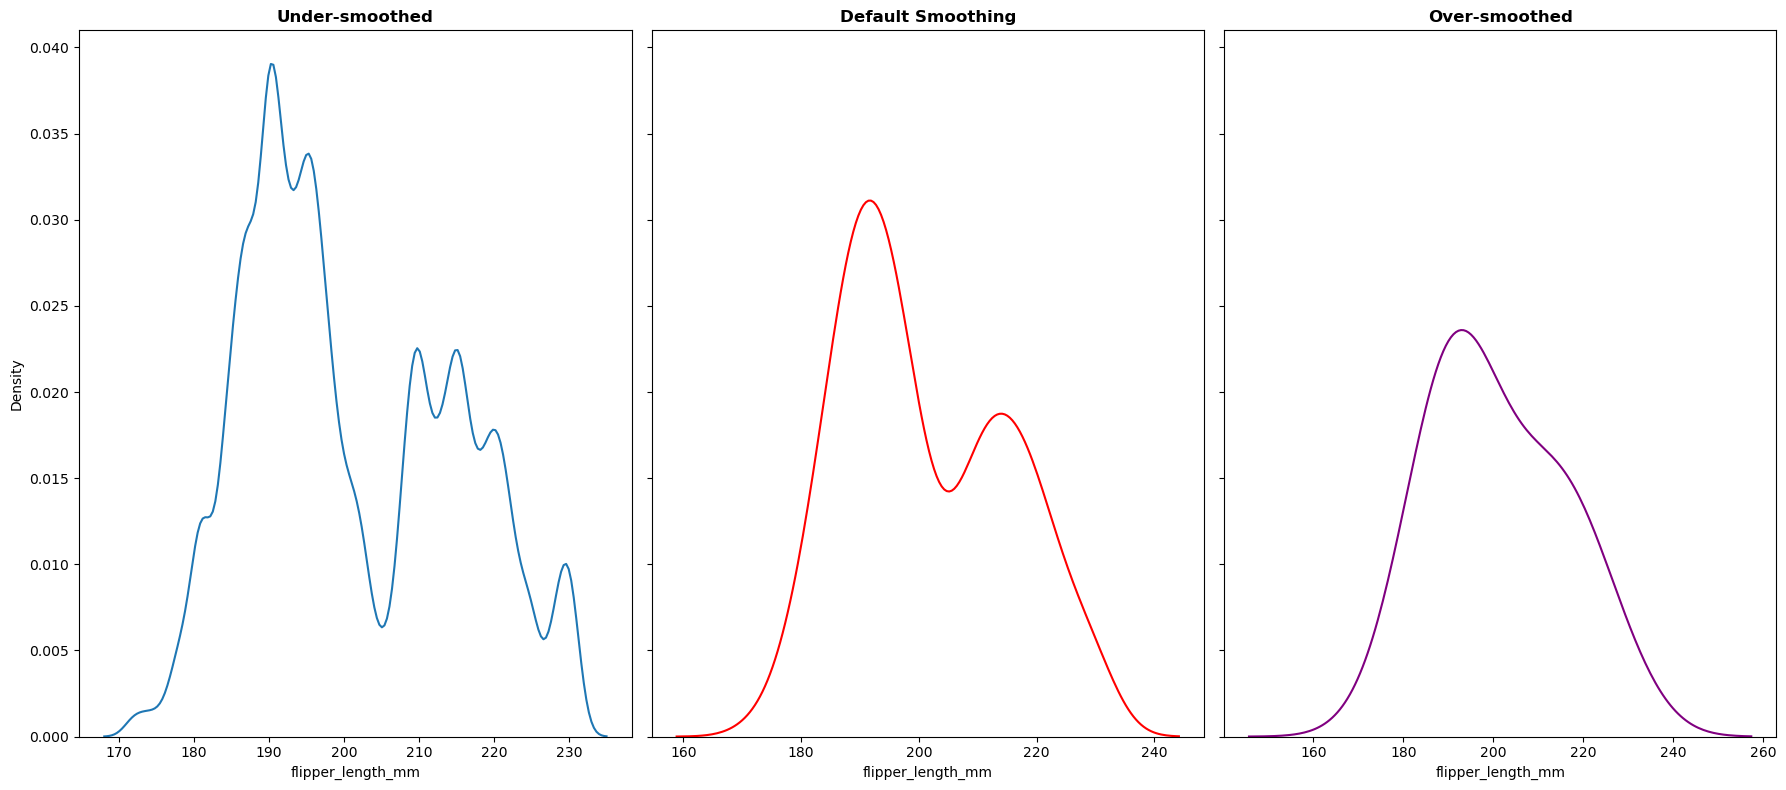

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# under-smoothed kde
sns.kdeplot(data=penguins, ax=ax1, x="flipper_length_mm", bw_adjust=0.3)
ax1.set_title("Under-smoothed", fontweight="bold")

# default smoothing
sns.kdeplot(data=penguins, ax=ax2, x="flipper_length_mm", color="red")
ax2.set_title("Default Smoothing", fontweight="bold")

# over-smoothed
sns.kdeplot(data=penguins, ax=ax3, x="flipper_length_mm", color="purple", bw_adjust=2)
ax3.set_title("Over-smoothed", fontweight="bold")

fig.tight_layout()

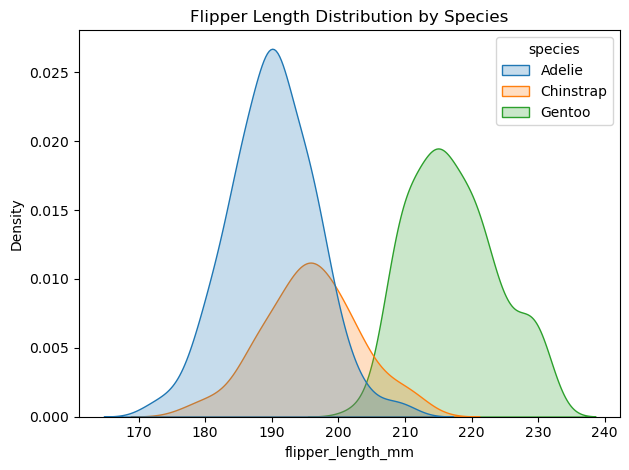

In [30]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", fill=True)
plt.title("Flipper Length Distribution by Species")
plt.tight_layout()

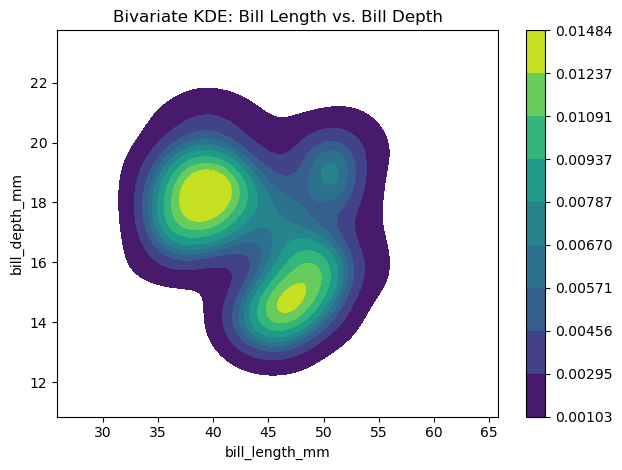

In [31]:
ax = sns.kdeplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    cmap="viridis",
    cbar=True,
    fill=True,
)
ax.set_title("Bivariate KDE: Bill Length vs. Bill Depth")

plt.tight_layout()

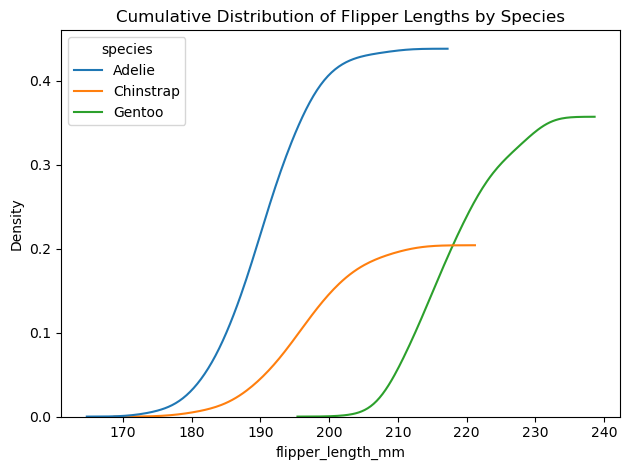

In [32]:
ax = sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", cumulative=True)
ax.set_title("Cumulative Distribution of Flipper Lengths by Species")

plt.tight_layout()

In [33]:
tips = sns.load_dataset("tips")

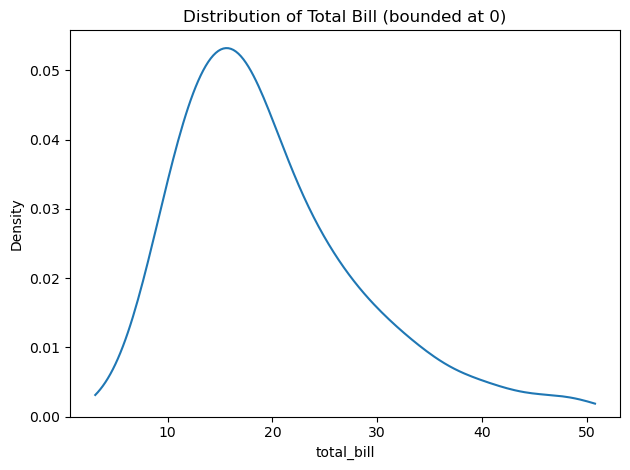

In [34]:
sns.kdeplot(data=tips, x="total_bill", cut=0)
plt.title("Distribution of Total Bill (bounded at 0)")

plt.tight_layout()

### Empirical Cumulative Distribution Function Plots

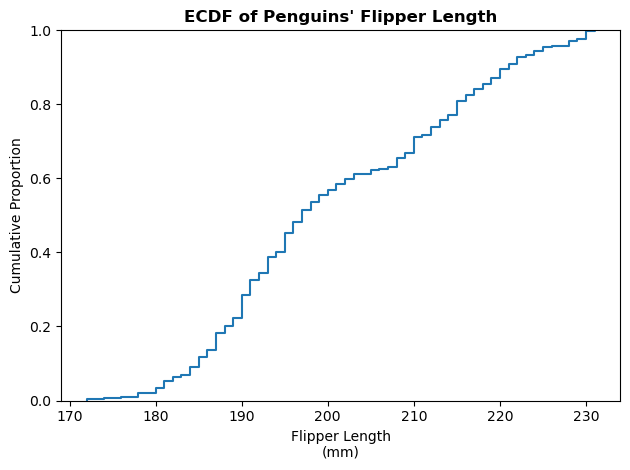

In [35]:
fig, ax = plt.subplots()

sns.ecdfplot(data=penguins, ax=ax, x="flipper_length_mm")
ax.set_title("ECDF of Penguins' Flipper Length", fontweight="bold")
ax.set_xlabel("Flipper Length\n(mm)")
ax.set_ylabel("Cumulative Proportion")

fig.tight_layout()

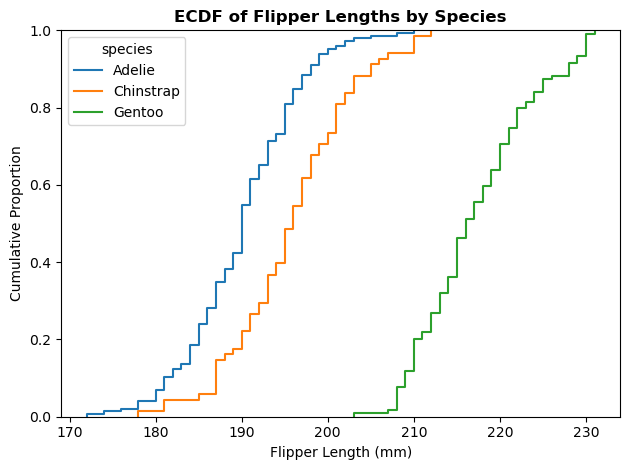

In [36]:
ax = sns.ecdfplot(data=penguins, x="flipper_length_mm", hue="species")
ax.set_title("ECDF of Flipper Lengths by Species", fontweight="bold")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Cumulative Proportion")

ax.figure.tight_layout()

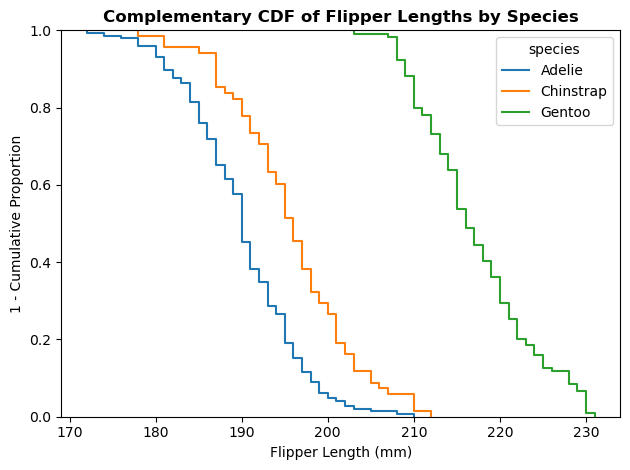

In [37]:
sns.ecdfplot(data=penguins, x="flipper_length_mm", hue="species", complementary=True)
plt.title("Complementary CDF of Flipper Lengths by Species", fontweight="bold")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("1 - Cumulative Proportion")

plt.tight_layout()

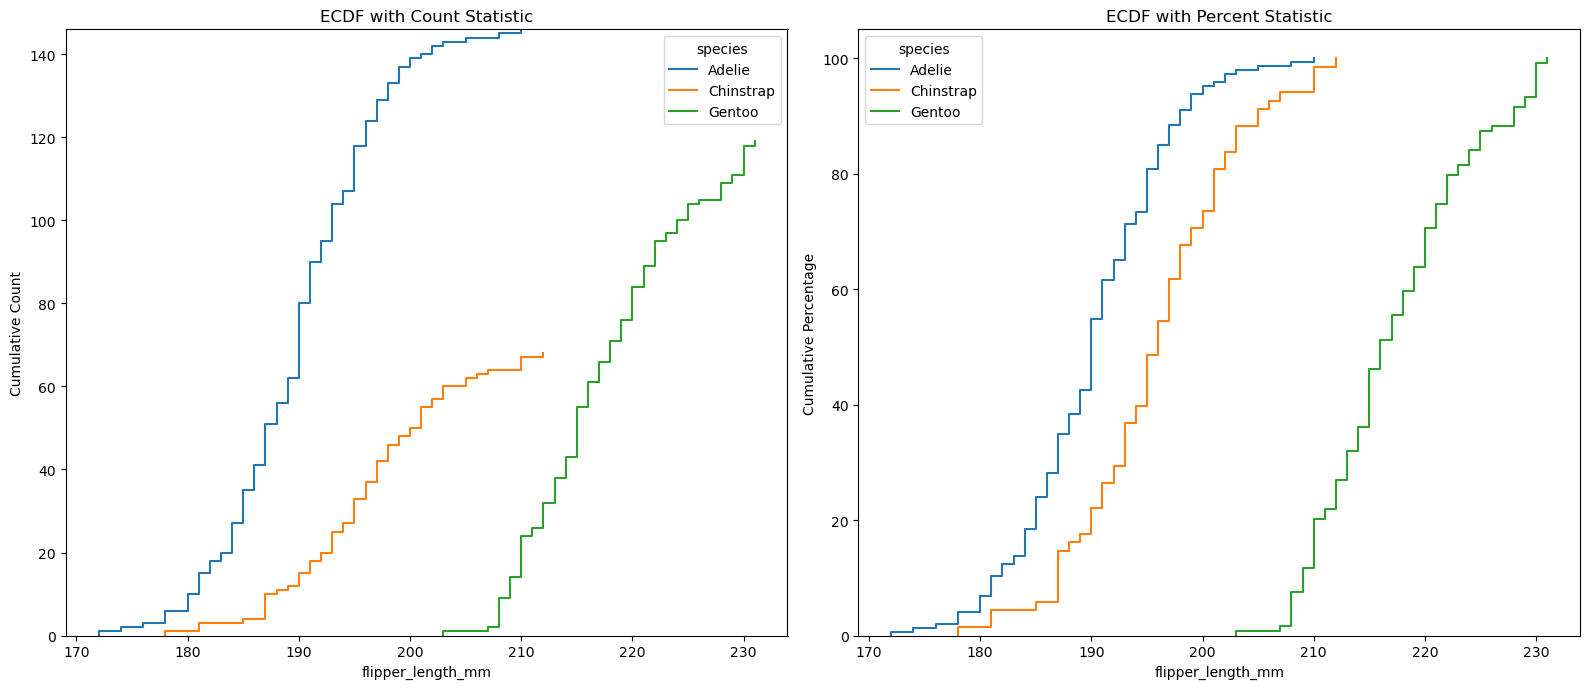

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# count statistic
sns.ecdfplot(data=penguins, ax=ax1, x="flipper_length_mm", hue="species", stat="count")
ax1.set_title("ECDF with Count Statistic")
ax1.set_ylabel("Cumulative Count")

# percent statistics
sns.ecdfplot(
    data=penguins, ax=ax2, x="flipper_length_mm", hue="species", stat="percent"
)
ax2.set_title("ECDF with Percent Statistic")
ax2.set_ylabel("Cumulative Percentage")

fig.tight_layout()

In [39]:
mean = penguins["flipper_length_mm"].mean()
std = penguins["flipper_length_mm"].std()

x = np.linspace(mean - 3 * std, mean + 3 * std, num=150)
y = stats.norm.cdf(x, loc=mean, scale=std)

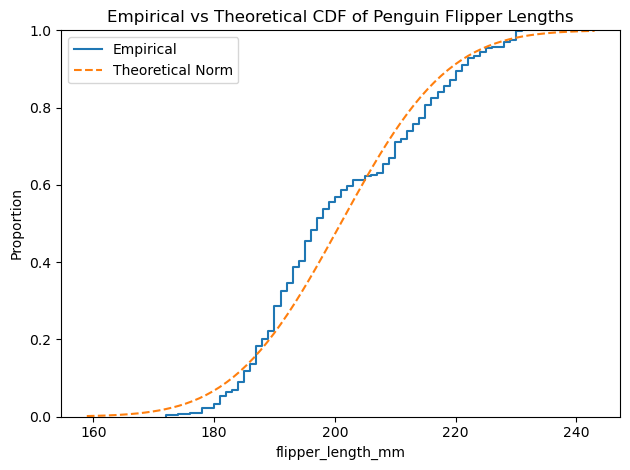

In [40]:
ax = sns.ecdfplot(data=penguins, x="flipper_length_mm", label="Empirical")
ax.set_title("Empirical vs Theoretical CDF of Penguin Flipper Lengths")

sns.lineplot(x=x, y=y, linestyle="--", label="Theoretical Norm", ax=ax)

plt.tight_layout()

### Rug Plots

In [41]:
tips = sns.load_dataset("tips")

In [42]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


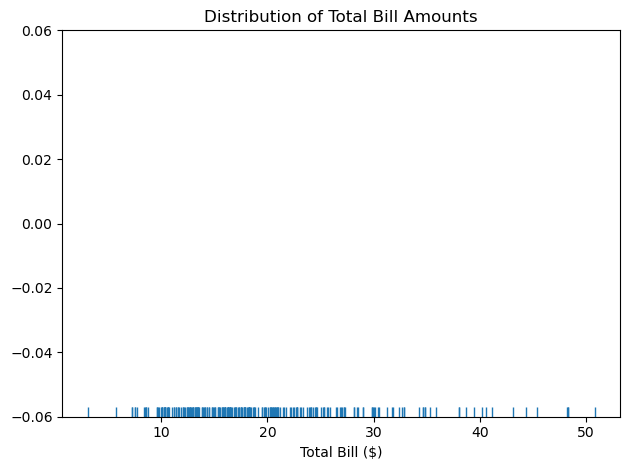

In [47]:
ax = sns.rugplot(data=tips, x="total_bill")
ax.set_title("Distribution of Total Bill Amounts")
ax.set_xlabel("Total Bill ($)")

ax.figure.tight_layout()

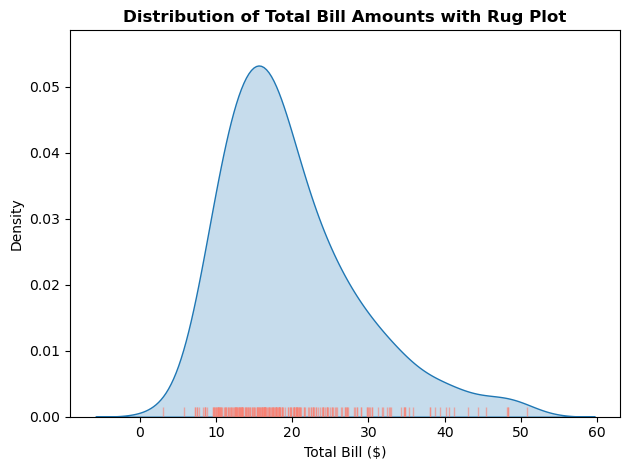

In [49]:
fig, ax = plt.subplots()
sns.kdeplot(data=tips, ax=ax, x="total_bill", fill=True)
sns.rugplot(data=tips, ax=ax, x="total_bill", color="salmon", alpha=0.6)

ax.set_title("Distribution of Total Bill Amounts with Rug Plot", fontweight="bold")
ax.set_xlabel("Total Bill ($)")

fig.tight_layout()

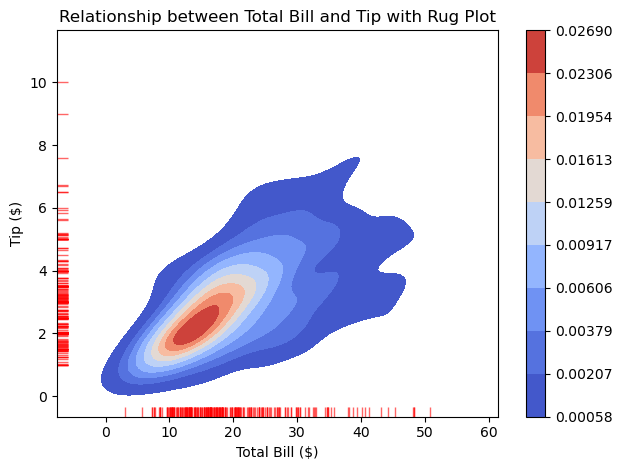

In [ ]:
ax = sns.kdeplot(
    data=tips, x="total_bill", y="tip", fill=True, cmap="coolwarm", cbar=True
)
sns.rugplot(data=tips, ax=ax, x="total_bill", y="tip", color="red", alpha=0.6)

ax.set(
    title="Relationship between Total Bill and Tip with Rug Plot",
    xlabel="Total Bill ($)",
    ylabel="Tip ($)",
)

plt.tight_layout()

### Figure Level Distribution Visualization

In [77]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


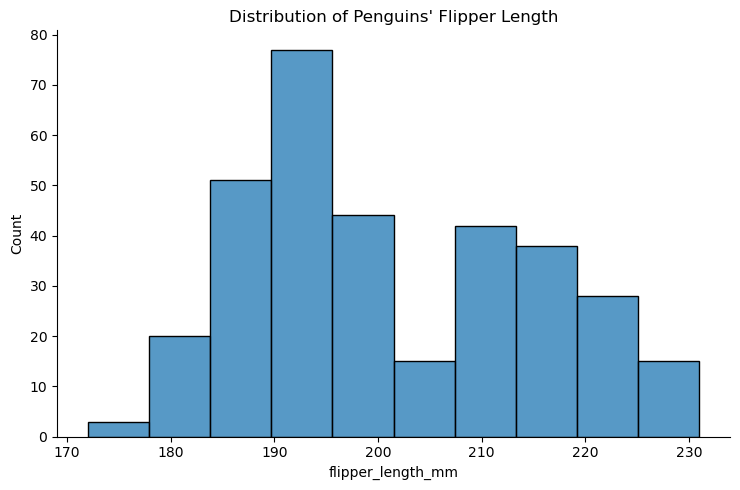

In [78]:
sns.displot(data=penguins, x="flipper_length_mm", aspect=1.5)
plt.title("Distribution of Penguins' Flipper Length")
plt.tight_layout()

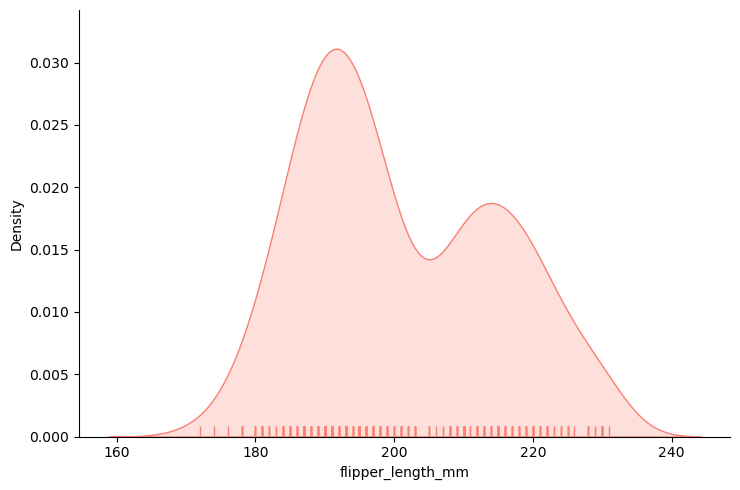

In [79]:
g = sns.displot(
    data=penguins,
    x="flipper_length_mm",
    kind="kde",
    fill=True,
    aspect=1.5,
    color="salmon",
    rug=True,
)

plt.tight_layout()

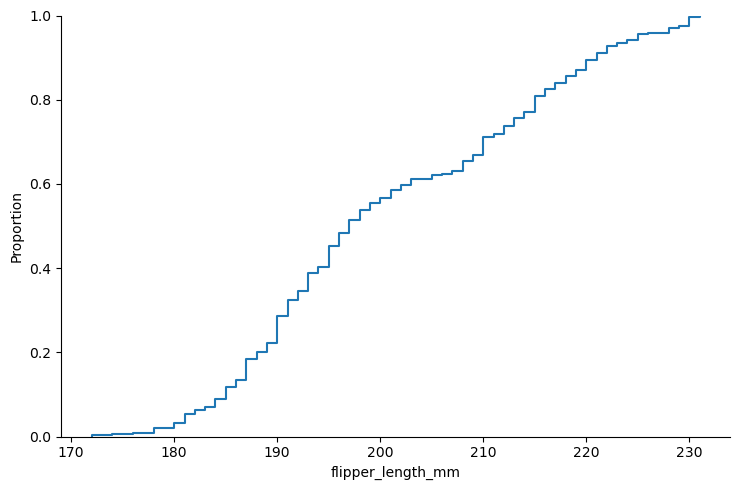

In [80]:
g = sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf", aspect=1.5)
plt.tight_layout()

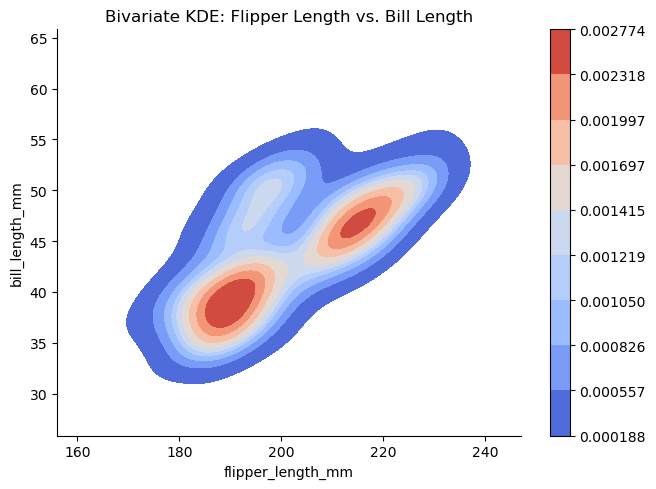

In [ ]:
g = sns.displot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    kind="kde",
    cmap="coolwarm",
    cbar=True,
    fill=True,
    aspect=4 / 3,
)
g.ax.set_title("Bivariate KDE: Flipper Length vs. Bill Length")

plt.tight_layout()

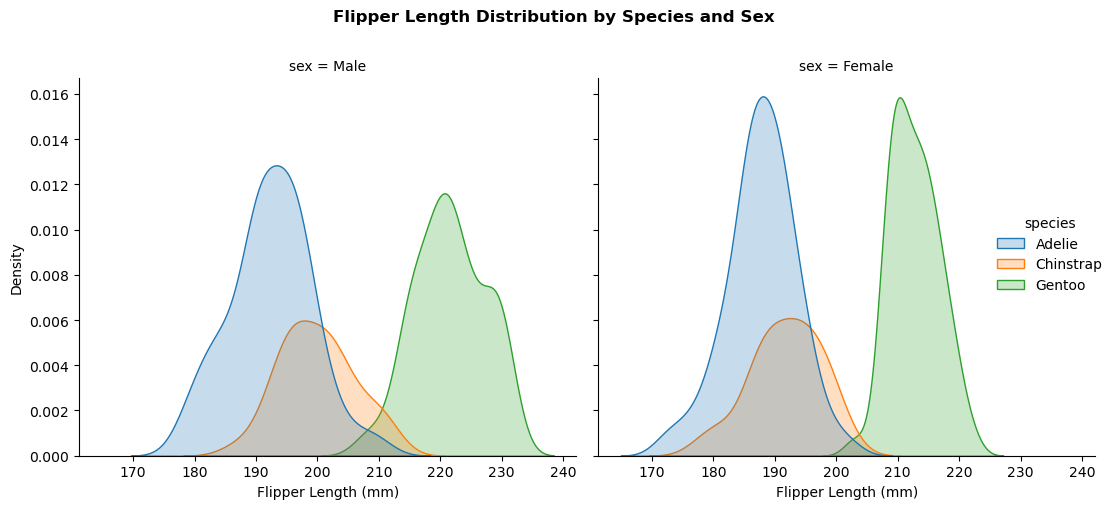

In [ ]:
g = sns.displot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    col="sex",
    kind="kde",
    fill=True,
)

g.set_axis_labels(x_var="Flipper Length (mm)")
g.figure.suptitle(
    "Flipper Length Distribution by Species and Sex", y=1.01, fontweight="bold"
)
plt.tight_layout()

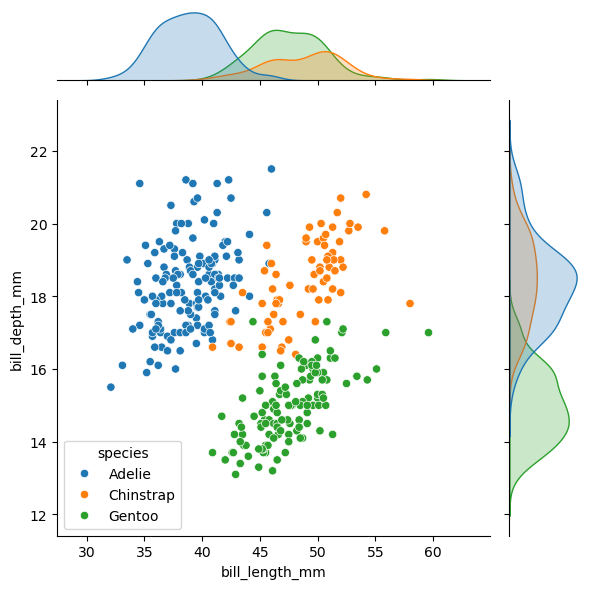

In [100]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
)
plt.tight_layout()

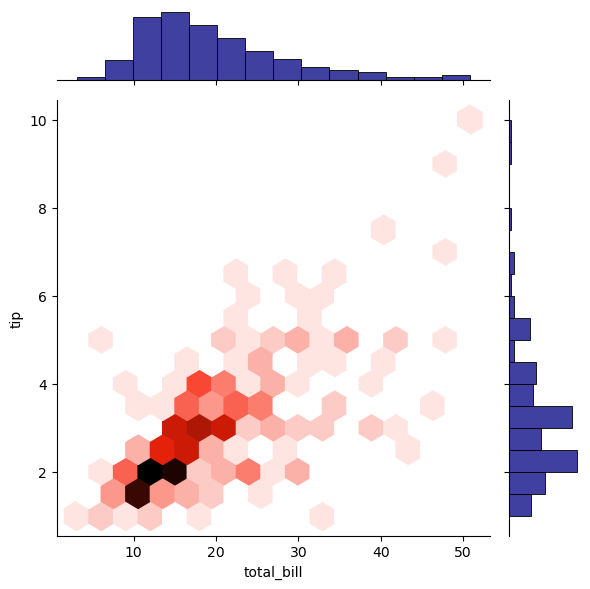

In [113]:
g = sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="hex",
    color="salmon",
    marginal_kws=dict(color="navy", linewidth=0.6),
)
plt.tight_layout()

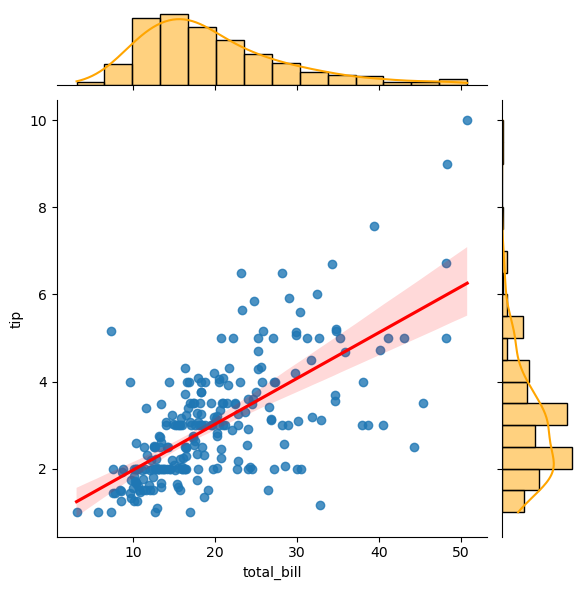

In [ ]:
g = sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="reg",
    line_kws={"color": "red"},
    marginal_kws={"color": "orange"},
)

In [114]:
type(g)

seaborn.axisgrid.JointGrid